# Work the data

In [1]:
import pandas as pd
import numpy as np

# Making the Dataframe and Cleaning the Data

In [2]:
#Read in the data
data = pd.read_csv('SensorData_trial.csv')

# Make a datetime string column combing the time and date
data['dt'] = data[' Date'] + data[' Time']
data.drop([' Date',' Time'], axis = 1, inplace = True)

In [6]:
# Format the dt string function
def clean(x):
    listy = x.split()
    listy.remove('00:00:00')
    new_date_string = " ".join(str(x) for x in listy)
    return new_date_string

In [7]:
# Apply the function
data['dt'] = data['dt'].apply(clean) 

ValueError: list.remove(x): x not in list

In [8]:
# Column Names
headers = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','E1','E2','E3','E4','E5','E6','E7','E8','E9','E10','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10','J1','J2','J3','J4','J5','J6','J7','J8','J9','J10']

In [9]:
# Make a function that takes an area eg A1 and makes a single column df of readings against time
# Also separates into closest 30 second window and finds avg when multiple.
# All the df's for each area can then be appended to a list and later merged

def make_a_column(area_subset_string, data):
    
    # Get a subset of the df for just 1 sensor area square get rid of anything not needed and clean up the names
    area_subset = data[data['Location'] == area_subset_string].copy() # subset
    area_subset.drop('Location', inplace = True, axis = 1) # Drop location col
    area_subset.drop(' Sensor Type', inplace = True, axis = 1) # Drop Sensor Type col
    area_subset['dt']= pd.to_datetime(area_subset['dt']) # Convert dt string col to datetime object
    area_subset.rename(columns={" Reading": area_subset_string, 'dt':'Time'}, inplace =True)

    #Round to the nearest 30 seconds function
    def time_round(x):
        hour = x.hour
        minute = x.minute
        if (x.second > 15) and (x.second <=45):
            second = 30
        elif (x.second <= 15):
            second = 0
        elif (x.second > 45):
            second = 0
            minute += 1
            if hour == 59:
                hour+=1
        return str(hour)+':'+str(minute)+':'+str(second)
    
    #Apply function to Time column and conv back to dt object
    area_subset['Time'] = area_subset['Time'].apply(time_round)
    area_subset['Time']= pd.to_datetime(area_subset['Time'])

    # If the time rows match we find the average i.e. if there are multiple in a 30 second window the average is taken
    return area_subset.groupby(['Time']).agg([np.average])

In [10]:
df_list = list()
df_lengths = list()

In [11]:
# Compile the list of dataframes to be merged
for x in headers:
    #Make the df
    temp = make_a_column(area_subset_string=x,data = data)
    # If the df just made was empty due to no sensor presence impute as 0
    if temp.empty:
        temp = df_list[0].copy()
        temp.rename(columns={"A1": x}, inplace =True)
        for col in temp.columns:
            temp[col].values[:] = 0
    else:
        pass
    # Append
    df_list.append(temp)
    df_lengths.append(len(temp))

c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only column

c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only column

c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
c:\users\scowt\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only column

In [12]:
# Check that we have a hundred sensor datframes
len(df_list)

100

In [13]:
# Instantiate the first column of the final df
super_final = df_list[0]

# Merge every df in the list of dfs to the first
for x in df_list[1:]:
    super_final = pd.merge(super_final, x, how = 'outer', left_index=True, right_index=True)

<AxesSubplot:>

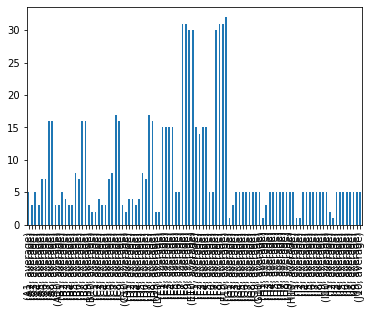

In [14]:
# Some columns will have null values due to missing readings or no sensor present.
super_final.isna().sum().plot.bar()

In [15]:
# Check out the superfinal df
pd.set_option("display.max_rows", None, "display.max_columns", None)
super_final

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10
,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 14:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29 14:11:30,108.0,25.5,155.0,153.0,1.0,22.0,95.5,49.0,0.0,24.5,8.0,219.5,83.5,29.0,7.0,24.0,3.0,27.0,4.0,29.0,3.0,48.0,7.0,32.0,1.0,2.0,1.0,1.5,5.0,3.0,98.0,579.0,162.5,43.0,1.0,175.0,0.0,3.0,70.0,46.0,27.0,75.0,224.0,28.0,0.0,0.0,133.0,4.0,1.0,171.0,30.0,27.0,1.5,3.0,0.0,0.0,150.0,24.0,197.5,2.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:00,108.0,25.0,150.0,148.0,1.0,21.5,91.0,50.5,1.5,25.0,5.0,221.0,90.0,31.0,6.0,22.5,1.5,28.0,2.0,23.0,4.0,57.0,7.0,28.5,1.0,1.0,3.5,2.0,5.0,0.0,99.0,572.0,161.0,42.0,2.0,171.5,1.0,3.0,70.0,44.5,NaN,NaN,NaN,NaN,0.0,0.0,140.0,6.5,0.0,170.0,NaN,NaN,NaN,NaN,0.0,0.0,148.0,31.0,205.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:30,106.0,25.0,146.5,145.0,0.5,24.0,91.5,49.0,3.0,26.5,6.0,223.5,117.5,30.0,8.5,24.0,5.0,28.0,4.0,29.0,3.5,76.0,9.0,29.0,1.0,0.0,3.0,3.0,11.0,3.0,97.0,571.0,160.5,40.0,2.0,172.0,1.0,0.5,71.0,45.0,22.5,146.0,209.0,51.0,0.0,0.0,146.0,0.0,0.0,169.0,23.0,27.0,2.0,2.0,0.0,0.0,154.0,25.5,200.5,5.0,0.5,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:00,107.5,24.0,142.0,145.0,1.0,31.5,94.0,48.0,3.0,25.0,7.0,221.0,153.0,31.0,6.0,25.0,1.0,27.0,4.5,28.0,3.0,89.0,13.0,48.0,2.0,6.0,2.0,2.0,3.0,2.0,96.0,585.0,161.0,40.0,5.5,173.0,4.0,3.0,71.0,44.5,21.0,140.0,212.0,55.0,0.0,0.0,145.5,8.5,11.0,171.0,23.5,27.0,34.0,3.0,0.0,0.0,149.0,25.0,202.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:30,107.0,25.0,143.0,143.0,1.5,22.0,95.0,51.0,2.0,25.0,5.0,223.0,153.5,32.0,5.0,26.0,0.0,25.5,3.0,28.5,3.0,88.0,6.0,63.0,1.0,1.0,2.0,1.0,3.0,2.0,99.5,599.0,159.0,40.5,1.0,173.0,0.0,2.0,74.5,43.0,17.5,138.0,210.0,56.0,0.0,0.0,142.0,14.0,0.0,165.5,26.0,27.0,2.0,3.0,0.0,0.0,143.5,25.0,207.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-1

In [16]:
# Drop the null heavy initialization row as the sensors are turning on
super_final.drop(index=super_final.index[0], axis=0, inplace=True)

In [17]:
# Drop the null heavy final three rows as sensors are turning off
super_final.drop(index=super_final.index[-1], axis=0, inplace=True)
super_final.drop(index=super_final.index[-1], axis=0, inplace=True)
super_final.drop(index=super_final.index[-1], axis=0, inplace=True)

In [18]:
# display the final super df
pd.set_option("display.max_rows", None, "display.max_columns", None)


super_final

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10
,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 14:11:30,108.0,25.5,155.0,153.0,1.0,22.0,95.5,49.0,0.0,24.5,8.0,219.5,83.5,29.0,7.0,24.0,3.0,27.0,4.0,29.0,3.0,48.0,7.0,32.0,1.0,2.0,1.0,1.5,5.0,3.0,98.0,579.0,162.5,43.0,1.0,175.0,0.0,3.0,70.0,46.0,27.0,75.0,224.0,28.0,0.0,0.0,133.0,4.0,1.0,171.0,30.0,27.0,1.5,3.0,0.0,0.0,150.0,24.0,197.5,2.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:00,108.0,25.0,150.0,148.0,1.0,21.5,91.0,50.5,1.5,25.0,5.0,221.0,90.0,31.0,6.0,22.5,1.5,28.0,2.0,23.0,4.0,57.0,7.0,28.5,1.0,1.0,3.5,2.0,5.0,0.0,99.0,572.0,161.0,42.0,2.0,171.5,1.0,3.0,70.0,44.5,NaN,NaN,NaN,NaN,0.0,0.0,140.0,6.5,0.0,170.0,NaN,NaN,NaN,NaN,0.0,0.0,148.0,31.0,205.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:30,106.0,25.0,146.5,145.0,0.5,24.0,91.5,49.0,3.0,26.5,6.0,223.5,117.5,30.0,8.5,24.0,5.0,28.0,4.0,29.0,3.5,76.0,9.0,29.0,1.0,0.0,3.0,3.0,11.0,3.0,97.0,571.0,160.5,40.0,2.0,172.0,1.0,0.5,71.0,45.0,22.5,146.0,209.0,51.0,0.0,0.0,146.0,0.0,0.0,169.0,23.0,27.0,2.0,2.0,0.0,0.0,154.0,25.5,200.5,5.0,0.5,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:00,107.5,24.0,142.0,145.0,1.0,31.5,94.0,48.0,3.0,25.0,7.0,221.0,153.0,31.0,6.0,25.0,1.0,27.0,4.5,28.0,3.0,89.0,13.0,48.0,2.0,6.0,2.0,2.0,3.0,2.0,96.0,585.0,161.0,40.0,5.5,173.0,4.0,3.0,71.0,44.5,21.0,140.0,212.0,55.0,0.0,0.0,145.5,8.5,11.0,171.0,23.5,27.0,34.0,3.0,0.0,0.0,149.0,25.0,202.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:30,107.0,25.0,143.0,143.0,1.5,22.0,95.0,51.0,2.0,25.0,5.0,223.0,153.5,32.0,5.0,26.0,0.0,25.5,3.0,28.5,3.0,88.0,6.0,63.0,1.0,1.0,2.0,1.0,3.0,2.0,99.5,599.0,159.0,40.5,1.0,173.0,0.0,2.0,74.5,43.0,17.5,138.0,210.0,56.0,0.0,0.0,142.0,14.0,0.0,165.5,26.0,27.0,2.0,3.0,0.0,0.0,143.5,25.0,207.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:14:00,105.0,25.0,143.0,143.5,3.0,21.0,91.0,48.0,4.0,26.0,5.0,223.0,157.0,30.5,4.0,25.5,2.5,26.0,1.0,30.0,2.0,106.0,10.0,71.0,1.0,0.0,2.5,2.0,1.0,3.5,110.0,574.0,161.5,45.0,1.5,174.0,2.0,3.0,70.0,42.0,20.0,145.5,208.5,61.5,0.0,0.0,136.0,5.0,7.0,148.0,22.5,27.0,3.0,3.0,0.0,0.0,147.0,22.0,196.0,1.5,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<AxesSubplot:>

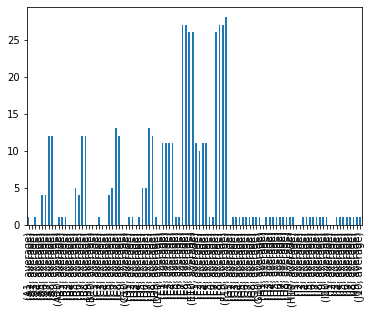

In [19]:
super_final.isna().sum().plot.bar()

In [20]:
# next up : split up into arrays and turn into im shows after imputing the Nans and standardising

In [21]:
######### EXPERIMENT TAKE THIS OUT WHEN SENSORS ARE FIXED
def zero(x):
    return 0

super_final.loc[:, ('D2', 'average')]= super_final['D2']['average'].apply(zero)

In [22]:
super_final

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10
,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 14:11:30,108.0,25.5,155.0,153.0,1.0,22.0,95.5,49.0,0.0,24.5,8.0,219.5,83.5,29.0,7.0,24.0,3.0,27.0,4.0,29.0,3.0,48.0,7.0,32.0,1.0,2.0,1.0,1.5,5.0,3.0,98.0,0,162.5,43.0,1.0,175.0,0.0,3.0,70.0,46.0,27.0,75.0,224.0,28.0,0.0,0.0,133.0,4.0,1.0,171.0,30.0,27.0,1.5,3.0,0.0,0.0,150.0,24.0,197.5,2.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:00,108.0,25.0,150.0,148.0,1.0,21.5,91.0,50.5,1.5,25.0,5.0,221.0,90.0,31.0,6.0,22.5,1.5,28.0,2.0,23.0,4.0,57.0,7.0,28.5,1.0,1.0,3.5,2.0,5.0,0.0,99.0,0,161.0,42.0,2.0,171.5,1.0,3.0,70.0,44.5,NaN,NaN,NaN,NaN,0.0,0.0,140.0,6.5,0.0,170.0,NaN,NaN,NaN,NaN,0.0,0.0,148.0,31.0,205.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:30,106.0,25.0,146.5,145.0,0.5,24.0,91.5,49.0,3.0,26.5,6.0,223.5,117.5,30.0,8.5,24.0,5.0,28.0,4.0,29.0,3.5,76.0,9.0,29.0,1.0,0.0,3.0,3.0,11.0,3.0,97.0,0,160.5,40.0,2.0,172.0,1.0,0.5,71.0,45.0,22.5,146.0,209.0,51.0,0.0,0.0,146.0,0.0,0.0,169.0,23.0,27.0,2.0,2.0,0.0,0.0,154.0,25.5,200.5,5.0,0.5,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:00,107.5,24.0,142.0,145.0,1.0,31.5,94.0,48.0,3.0,25.0,7.0,221.0,153.0,31.0,6.0,25.0,1.0,27.0,4.5,28.0,3.0,89.0,13.0,48.0,2.0,6.0,2.0,2.0,3.0,2.0,96.0,0,161.0,40.0,5.5,173.0,4.0,3.0,71.0,44.5,21.0,140.0,212.0,55.0,0.0,0.0,145.5,8.5,11.0,171.0,23.5,27.0,34.0,3.0,0.0,0.0,149.0,25.0,202.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:30,107.0,25.0,143.0,143.0,1.5,22.0,95.0,51.0,2.0,25.0,5.0,223.0,153.5,32.0,5.0,26.0,0.0,25.5,3.0,28.5,3.0,88.0,6.0,63.0,1.0,1.0,2.0,1.0,3.0,2.0,99.5,0,159.0,40.5,1.0,173.0,0.0,2.0,74.5,43.0,17.5,138.0,210.0,56.0,0.0,0.0,142.0,14.0,0.0,165.5,26.0,27.0,2.0,3.0,0.0,0.0,143.5,25.0,207.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:14:00,105.0,25.0,143.0,143.5,3.0,21.0,91.0,48.0,4.0,26.0,5.0,223.0,157.0,30.5,4.0,25.5,2.5,26.0,1.0,30.0,2.0,106.0,10.0,71.0,1.0,0.0,2.5,2.0,1.0,3.5,110.0,0,161.5,45.0,1.5,174.0,2.0,3.0,70.0,42.0,20.0,145.5,208.5,61.5,0.0,0.0,136.0,5.0,7.0,148.0,22.5,27.0,3.0,3.0,0.0,0.0,147.0,22.0,196.0,1.5,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,0.0,0.0,0.

In [23]:
super_final.fillna(0)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10
,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average,average
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 14:11:30,108.0,25.5,155.0,153.0,1.0,22.0,95.5,49.0,0.0,24.5,8.0,219.5,83.5,29.0,7.0,24.0,3.0,27.0,4.0,29.0,3.0,48.0,7.0,32.0,1.0,2.0,1.0,1.5,5.0,3.0,98.0,0,162.5,43.0,1.0,175.0,0.0,3.0,70.0,46.0,27.0,75.0,224.0,28.0,0.0,0.0,133.0,4.0,1.0,171.0,30.0,27.0,1.5,3.0,0.0,0.0,150.0,24.0,197.5,2.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:00,108.0,25.0,150.0,148.0,1.0,21.5,91.0,50.5,1.5,25.0,5.0,221.0,90.0,31.0,6.0,22.5,1.5,28.0,2.0,23.0,4.0,57.0,7.0,28.5,1.0,1.0,3.5,2.0,5.0,0.0,99.0,0,161.0,42.0,2.0,171.5,1.0,3.0,70.0,44.5,0.0,0.0,0.0,0.0,0.0,0.0,140.0,6.5,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,31.0,205.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:12:30,106.0,25.0,146.5,145.0,0.5,24.0,91.5,49.0,3.0,26.5,6.0,223.5,117.5,30.0,8.5,24.0,5.0,28.0,4.0,29.0,3.5,76.0,9.0,29.0,1.0,0.0,3.0,3.0,11.0,3.0,97.0,0,160.5,40.0,2.0,172.0,1.0,0.5,71.0,45.0,22.5,146.0,209.0,51.0,0.0,0.0,146.0,0.0,0.0,169.0,23.0,27.0,2.0,2.0,0.0,0.0,154.0,25.5,200.5,5.0,0.5,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:00,107.5,24.0,142.0,145.0,1.0,31.5,94.0,48.0,3.0,25.0,7.0,221.0,153.0,31.0,6.0,25.0,1.0,27.0,4.5,28.0,3.0,89.0,13.0,48.0,2.0,6.0,2.0,2.0,3.0,2.0,96.0,0,161.0,40.0,5.5,173.0,4.0,3.0,71.0,44.5,21.0,140.0,212.0,55.0,0.0,0.0,145.5,8.5,11.0,171.0,23.5,27.0,34.0,3.0,0.0,0.0,149.0,25.0,202.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:13:30,107.0,25.0,143.0,143.0,1.5,22.0,95.0,51.0,2.0,25.0,5.0,223.0,153.5,32.0,5.0,26.0,0.0,25.5,3.0,28.5,3.0,88.0,6.0,63.0,1.0,1.0,2.0,1.0,3.0,2.0,99.5,0,159.0,40.5,1.0,173.0,0.0,2.0,74.5,43.0,17.5,138.0,210.0,56.0,0.0,0.0,142.0,14.0,0.0,165.5,26.0,27.0,2.0,3.0,0.0,0.0,143.5,25.0,207.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-29 14:14:00,105.0,25.0,143.0,143.5,3.0,21.0,91.0,48.0,4.0,26.0,5.0,223.0,157.0,30.5,4.0,25.5,2.5,26.0,1.0,30.0,2.0,106.0,10.0,71.0,1.0,0.0,2.5,2.0,1.0,3.5,110.0,0,161.5,45.0,1.5,174.0,2.0,3.0,70.0,42.0,20.0,145.5,208.5,61.5,0.0,0.0,136.0,5.0,7.0,148.0,22.5,27.0,3.0,3.0,0.0,0.0,147.0,22.0,196.0,1.5,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,0.0,0.0,0.

# Making an array from the dataframe for the NN and gif animation

In [24]:
# Make a list of 10 by 10 2d arrays as the frames
array_frames = list()

for index, row in super_final.iterrows():
    array_frames.append(row.to_numpy().reshape(10,10))

In [25]:
# convert the list to an array
array_frames = np.array(array_frames)
array_frames.shape

(65, 10, 10)

In [26]:
# NOTE: array_frames is now usable for the model

In [27]:
# array_frames = np.expand_dims(array_frames, axis=-1)
array_frames.shape

(65, 10, 10)

# Make a single frame snapshot of the sensor reading
# Each pixel on the 10 by 10 pixel array represents the sensor reading on the 10 by 10 simulation at a single moment in time

In [24]:
# Normalize so all values are scaled between 0 and 1
array_frames = array_frames  /  (   data[' Reading'].max()   )

In [25]:
# Multiply by 255 for 0-255 grayscale and convert to uint8 for the 
array_frames = array_frames*255
array_frames = array_frames.astype(np.uint8)

In [29]:
array_frames.shape

(65, 10, 10)

(10, 10)


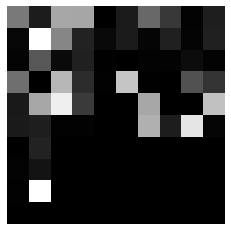

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

# Select a random example from the validation dataset.
example = array_frames

# Construct a figure for the original and new frames.
fig, ax = plt.subplots()
print(array_frames[2].shape)
ax.imshow(np.squeeze(array_frames[2]), cmap="gray")
ax.axis("off")

# Display the figure.
plt.show()

# Repeat above for all of the 30 second intervals (rows) in the experiment trial and stitch into an animated gif

C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


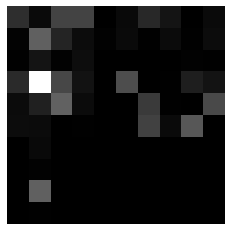

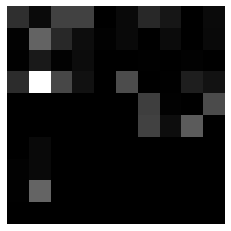

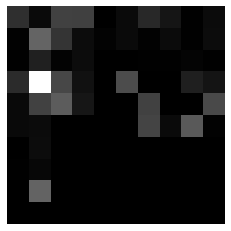

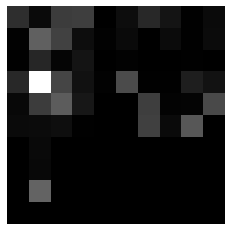

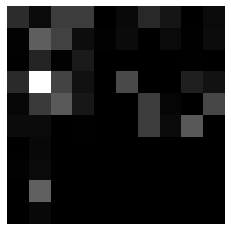

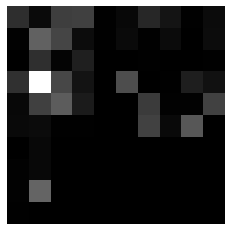

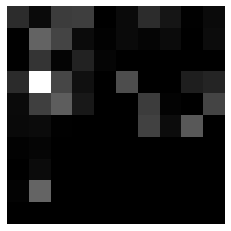

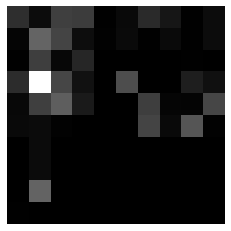

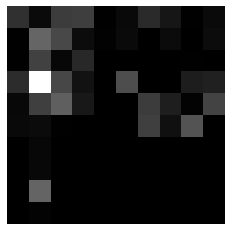

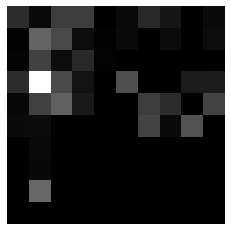

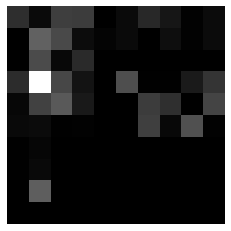

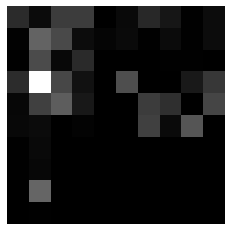

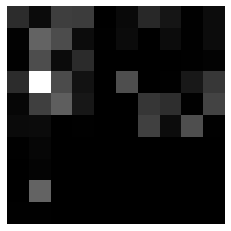

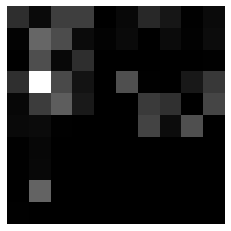

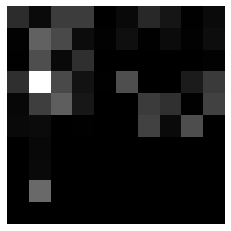

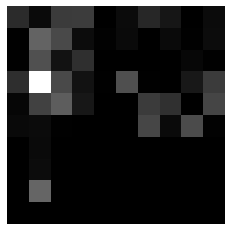

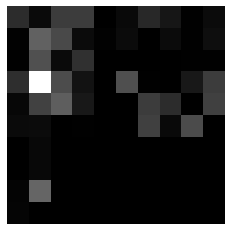

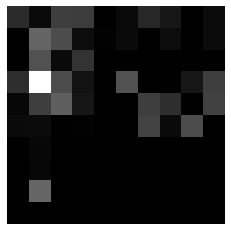

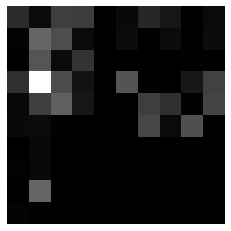

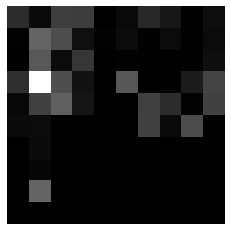

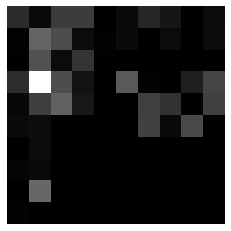

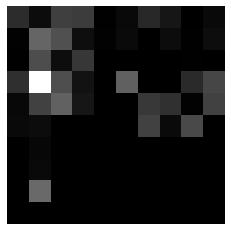

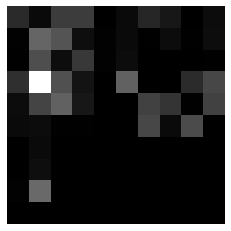

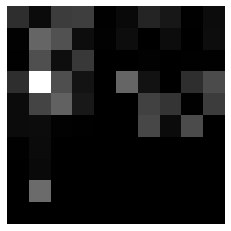

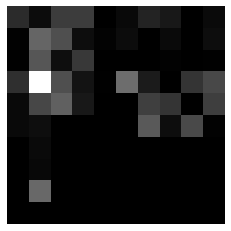

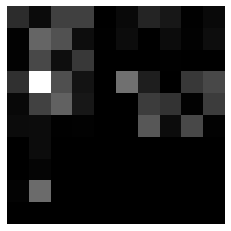

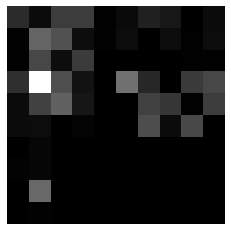

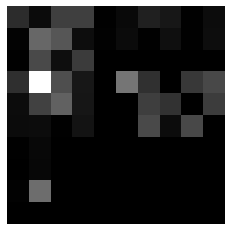

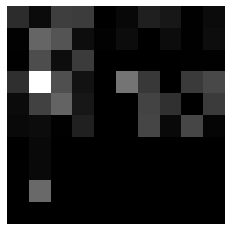

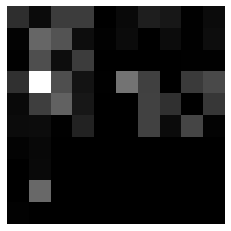

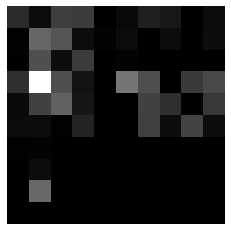

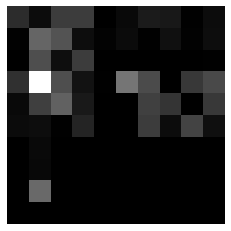

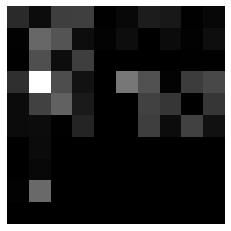

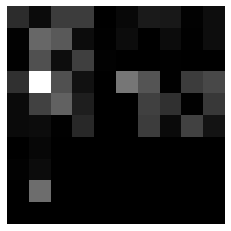

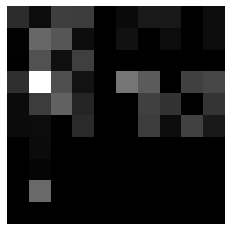

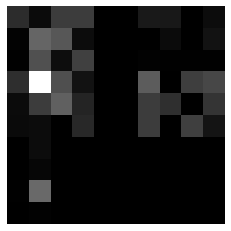

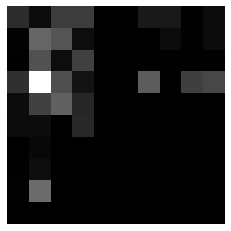

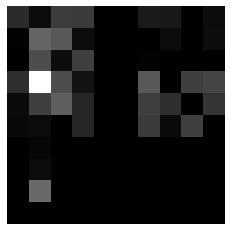

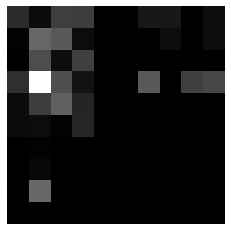

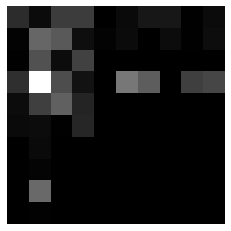

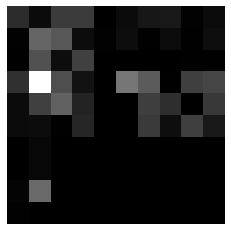

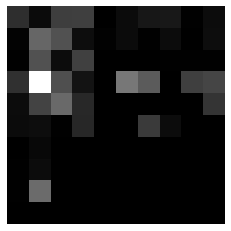

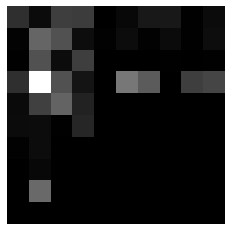

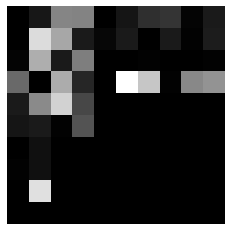

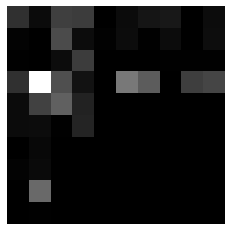

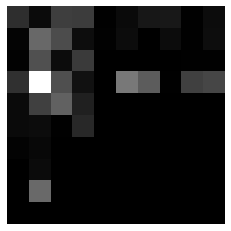

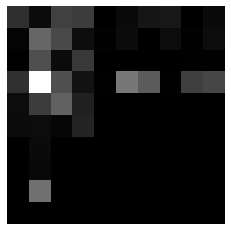

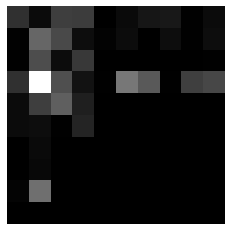

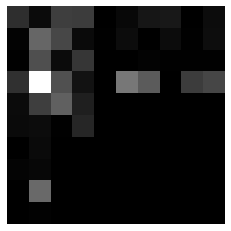

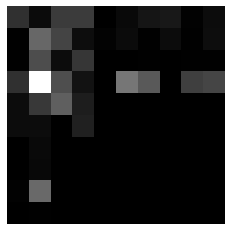

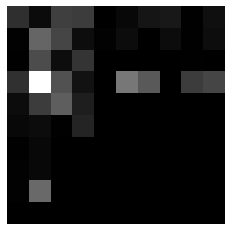

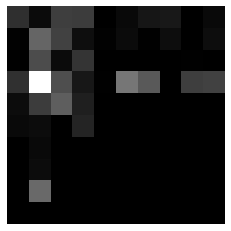

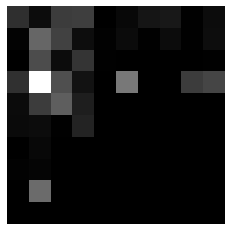

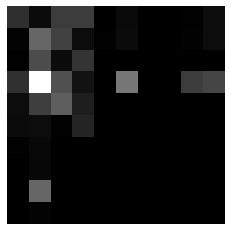

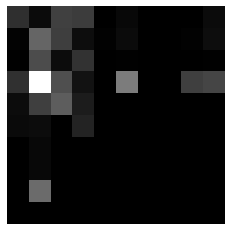

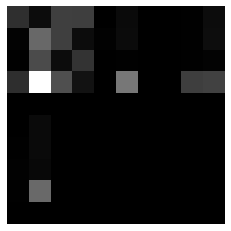

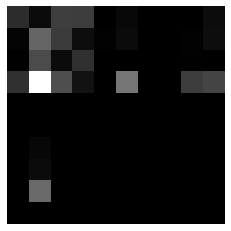

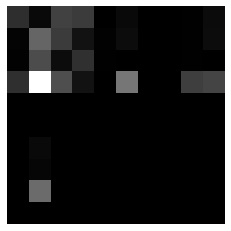

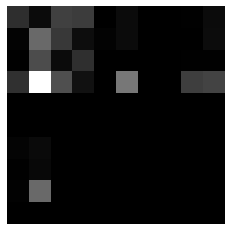

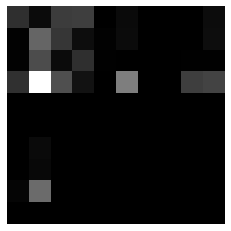

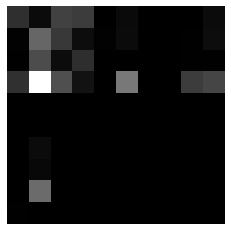

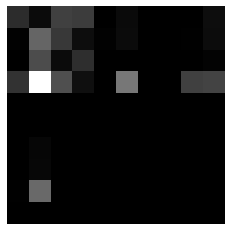

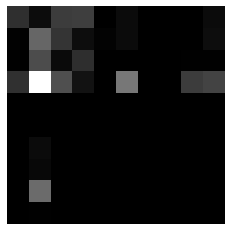

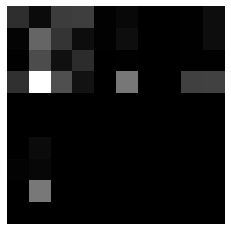

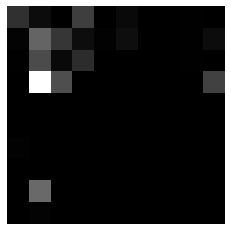

In [27]:
# Make an image file for each of the rows
filenames = []
for x in range(len(array_frames)):
    fig, ax = plt.subplots()
    ax.imshow(np.squeeze(array_frames[x]), cmap="gray")
    ax.axis("off")
    filename = 'C:/Users/steph/OneDrive/Documents/GitHub/FLOOD_SIM/pngs/'+str(x)+".png"
    plt.savefig(filename)
    filenames.append(filename)

In [28]:
# Make the gif
filename = 'C:/Users/steph/OneDrive/Documents/GitHub/FLOOD_SIM/pngs'
number_of_frames = 2
import imageio
with imageio.get_writer('C:/Users/steph/OneDrive/Documents/GitHub/FLOOD_SIM/pngs/mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        for x in range(number_of_frames):
            writer.append_data(image)

In [29]:
# Remove unnecessary image files pngs
import os
for filename in set(filenames):
    os.remove(filename)

# Making up some lies of videos

In [90]:
multi_video_array = array_frames.copy()

list_of_videos = [array_frames]

for x in range(0,99):
    
    # Make a 65,10,10 array with numbers from 0 to 10
    lie_frames = np.random.rand(65,  10,  10)*10
    
    # Add the the lie frames to the original video to make a new video of lies
    lie_frames = lie_frames+array_frames
    lie_frames = lie_frames.round()
    
    # Add the video to the list of lies
    list_of_videos.append(lie_frames)

multi_video_array = np.stack(list_of_videos)

multi_video_array.shape

(100, 65, 10, 10)

In [91]:
# We no have 101 video that can be put into the model

In [92]:
# save numpy array as npy file
from numpy import save
# define data
# save to npy file
save('data.npy', multi_video_array)